Сбор и разметка данных (семинары)
Урок 8. Работа с данными
Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.

In [1]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('train.csv')


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df['LotFrontage'].info()
df['LotFrontage'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [7]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [8]:
df['LotFrontage'].unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  70.04995837,
        51.        ,  50.        ,  70.        ,  91.        ,
        72.        ,  66.        , 101.        ,  57.        ,
        44.        , 110.        ,  98.        ,  47.        ,
       108.        , 112.        ,  74.        , 115.        ,
        61.        ,  48.        ,  33.        ,  52.        ,
       100.        ,  24.        ,  89.        ,  63.        ,
        76.        ,  81.        ,  95.        ,  69.        ,
        21.        ,  32.        ,  78.        , 121.        ,
       122.        ,  40.        , 105.        ,  73.        ,
        77.        ,  64.        ,  94.        ,  34.        ,
        90.        ,  55.        ,  88.        ,  82.        ,
        71.        , 120.        , 107.        ,  92.        ,
       134.        ,  62.        ,  86.        , 141.        ,
        97.        ,  54.        ,  41.        ,  79.  

In [10]:
df['FireplaceQu'].info()
df['FireplaceQu'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: FireplaceQu
Non-Null Count  Dtype 
--------------  ----- 
770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [13]:
# заменим Nan на другие слова
df['FireplaceQu'] = df['FireplaceQu'].fillna("oops, not cosy")

In [14]:
df['Fence'].info()
df['Fence'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Fence
Non-Null Count  Dtype 
--------------  ----- 
281 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [24]:
df['Alley'] = df['Alley'].fillna("nope")

In [17]:
df['Fence'] = df['Fence'].fillna("everybody can see you")

In [ ]:
df['PoolQC'] = df['PoolQC'].fillna("dirty_pool")

In [26]:
df['MiscFeature'] = df['MiscFeature'].fillna(":(")

In [21]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [22]:
# Преобразуем тип данных цены
df['SalePrice'] = df['SalePrice'].astype(float)

In [27]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,nope,Reg,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,nope,Reg,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,nope,IR1,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,nope,IR1,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,nope,IR1,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,12,2008,WD,Normal,250000.0


Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [29]:
df1 = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']
df_eda = df[df1]
df_eda.head()

,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,208500.0
1,6,1262,2,181500.0
2,7,1786,2,223500.0
3,7,1717,3,140000.0
4,8,2198,3,250000.0


E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


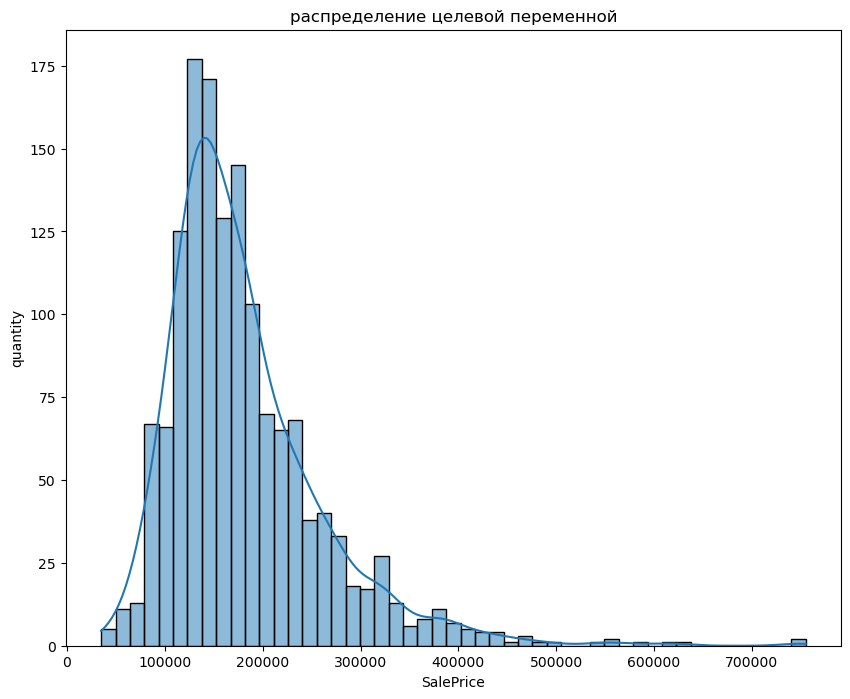

In [32]:
plt.figure(figsize=(10, 8))
sns.histplot(df_eda["SalePrice"], kde=True)
plt.xlabel("SalePrice")
plt.ylabel("quantity")
plt.title("распределение целевой переменной")
plt.show()

как видим из графика - наибольшее количество домов по цене от 100К до 400К

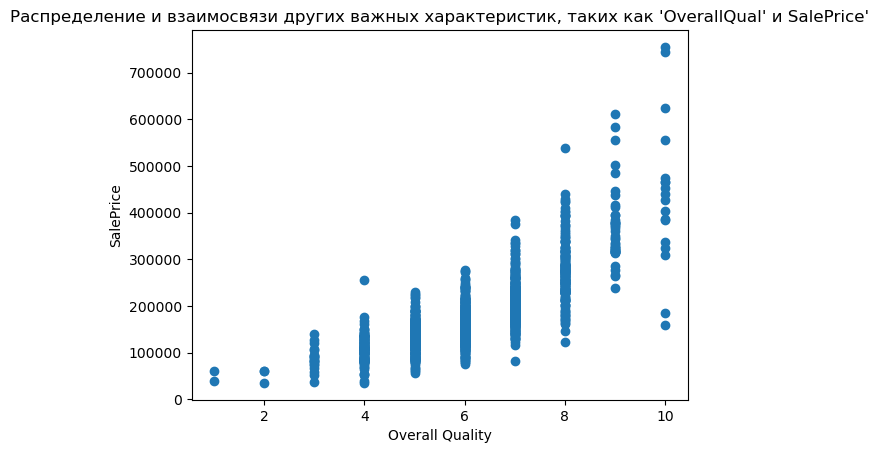

In [41]:
plt.scatter(df_eda["OverallQual"], df_eda["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.title("Распределение и взаимосвязи других важных характеристик, таких как 'OverallQual' и SalePrice'")
plt.show()

Качество и напрямую зависит от цены 

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

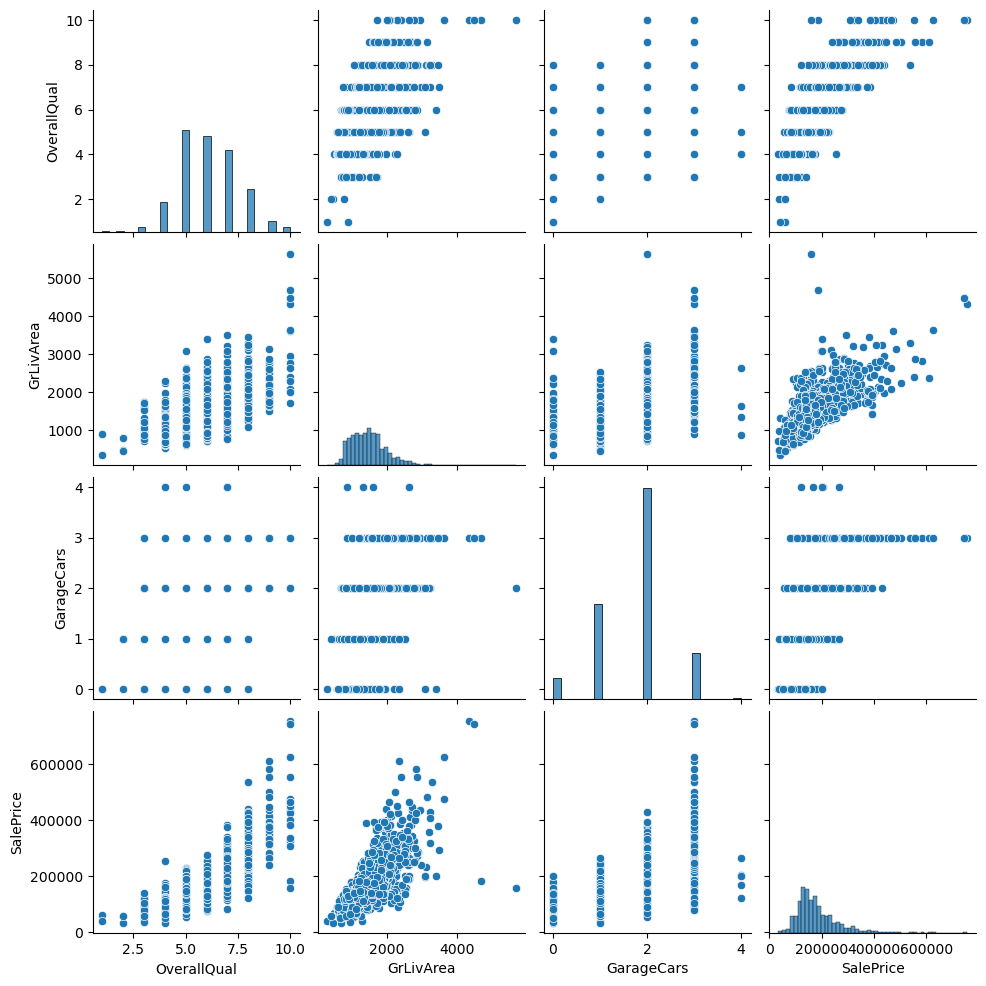

In [42]:
sns.pairplot(df_eda)
plt.show()

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [43]:
!pip install scikit-learn

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])

In [45]:
df['MSZoning'].unique()

array([3, 4, 0, 1, 2])

In [46]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,nope,Reg,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,2,2008,WD,Normal,208500.0
1,2,20,3,80.0,9600,Pave,nope,Reg,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,5,2007,WD,Normal,181500.0
2,3,60,3,68.0,11250,Pave,nope,IR1,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,9,2008,WD,Normal,223500.0
3,4,70,3,60.0,9550,Pave,nope,IR1,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,2,2006,WD,Abnorml,140000.0
4,5,60,3,84.0,14260,Pave,nope,IR1,Lvl,AllPub,...,0,dirty_pool,everybody can see you,:(,0,12,2008,WD,Normal,250000.0


Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [47]:
df.to_csv('cleaned_house_prices.csv', index=False)